# Modelo 1er. parcial
__UNLZ - Facultad de Ingeniería__       
__Electrotecnia__      
__Alumno:__ Daniel Antonio Lorenzo

## Ejercicio 1

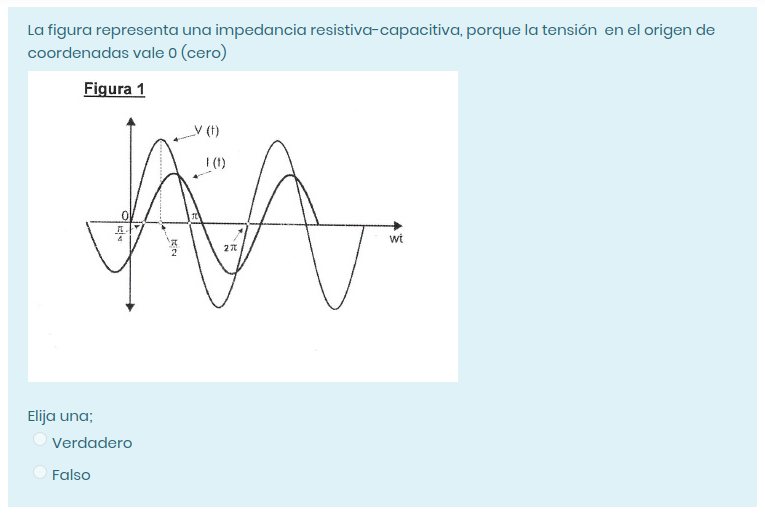

__Falso__

----------
<p style="background-color:Gold"><strong>Graficando con python y matplotlib (opcional)</strong></p>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
f = 50 # Hz
w = 2*np.pi*f
# Voltaje
def va(t):
  return (220*np.sqrt(2))*np.sin(w*t)
# Corriente
def ia(t):
  return (10*np.sqrt(2))*np.sin(w*t - np.pi/4)

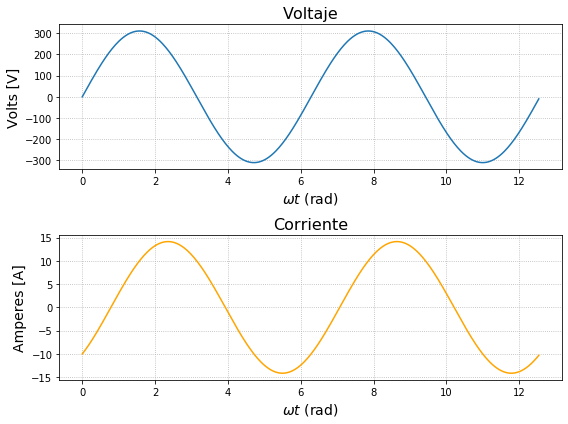

In [ ]:
#@title Gráfico:
%matplotlib inline
plt.figure(figsize=(8,6))

t = np.arange(0, 0.04 , 0.0001)

plt.subplot(211)
plt.plot(w*t, va(t))
plt.title('Voltaje', fontsize=16)
plt.xlabel('$\omega t$ (rad)', fontsize=14)
plt.ylabel('Volts [V]', fontsize=14)
plt.grid(linestyle=":")
plt.subplot(212)
plt.plot(w*t, ia(t), color='orange')
plt.title('Corriente', fontsize=16)
plt.xlabel('$\omega t$ (rad)', fontsize=14)
plt.ylabel('Amperes [A]', fontsize=14)
plt.grid(linestyle=":")

plt.tight_layout()
plt.draw()
plt.show()

In [ ]:
%reset -s -f

## Ejercicio 2

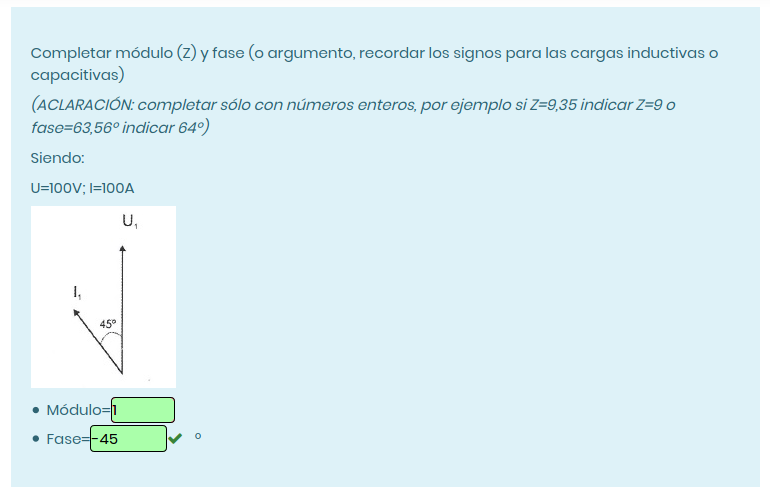

Cálculo de impedancia
$$ Z = {U \over I} = {100 \angle 90^\circ \, \mathrm{V} \over 100 \angle 135^\circ \, \mathrm{A}} = 1 \angle -45^\circ \, \Omega $$

## Ejercicio 3

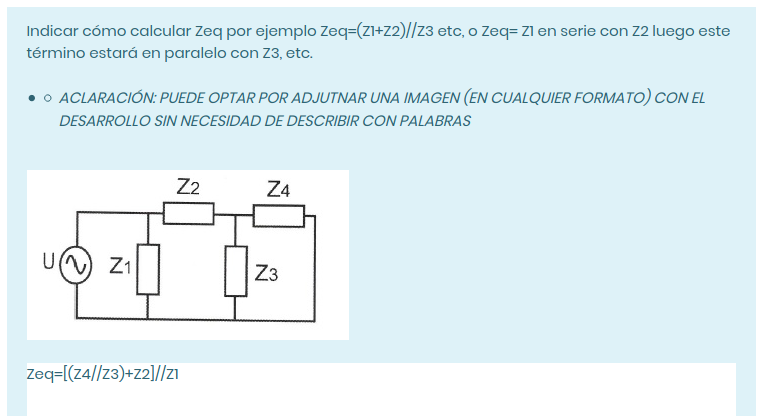

Impedancia equivalente
$$ Z_{eq} = [(Z_4 // Z_3) + Z_2] // Z_1  $$

Hacemos $Z_4//Z_3$
$$ Z' = \frac{Z_3 \cdot Z_4}{Z_3 + Z_4} $$

En serie con $Z_2$
$$ Z'' = Z' + Z_2 $$

Entonces:
$$ Z_{eq} = \frac{Z'' \cdot Z_1}{Z'' + Z_1} $$

## Ejercicio 4

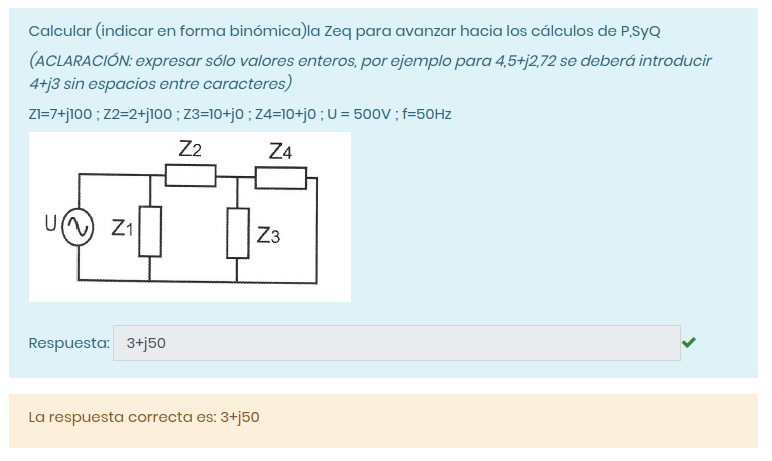

In [ ]:
# Datos
Z1 = 7 + 100j # Ohm
Z2 = 2 + 100j # Ohm
Z3 = 10 + 0j # Ohm
Z4 = 10 + 0j # Ohm
U = 500 # V
f = 50 # Hz

In [ ]:
# función que calcula elementos en paralelo
def prl(x,y):
    return (x*y)/(x + y)

In [ ]:
# Cálculo de Zeq
Zeq = prl( prl(Z4,Z3) + Z2 , Z1 )

In [ ]:
print('Zeq = {:.1f} Ohm'.format(Zeq))

Zeq = 3.5+50.0j Ohm


## Ejercicio 5

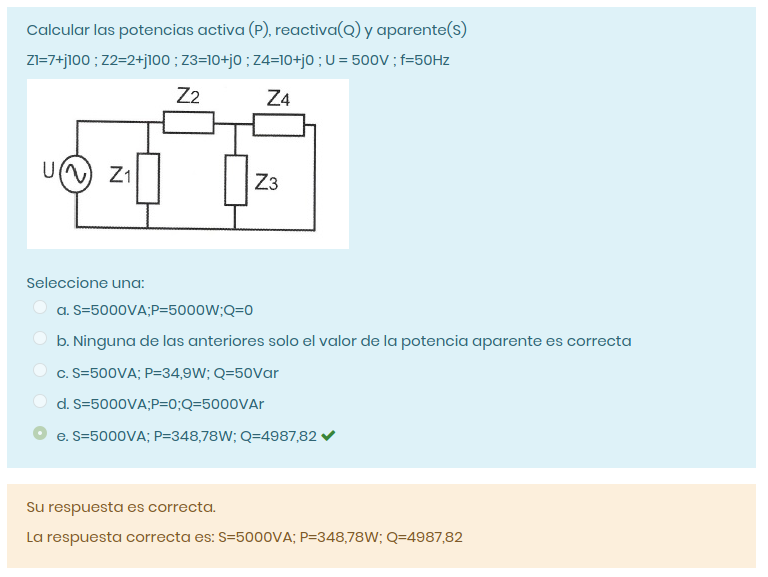

In [ ]:
# Cálculo de I1
I1 = U/Zeq
# Cálculo de potencia
S = U*I1.conjugate()
P = S.real
Q = S.imag

In [ ]:
#@title Imprime:
print('Resultados:')
print('|S| = %.2f VA'%(abs(S)))
print(' P  = %.2f W'%P)
print(' Q  = %.2f VAr'%Q)

Resultados:
|S| = 4987.79 VA
 P  = 348.29 W
 Q  = 4975.62 VAr


## Ejercicio 6

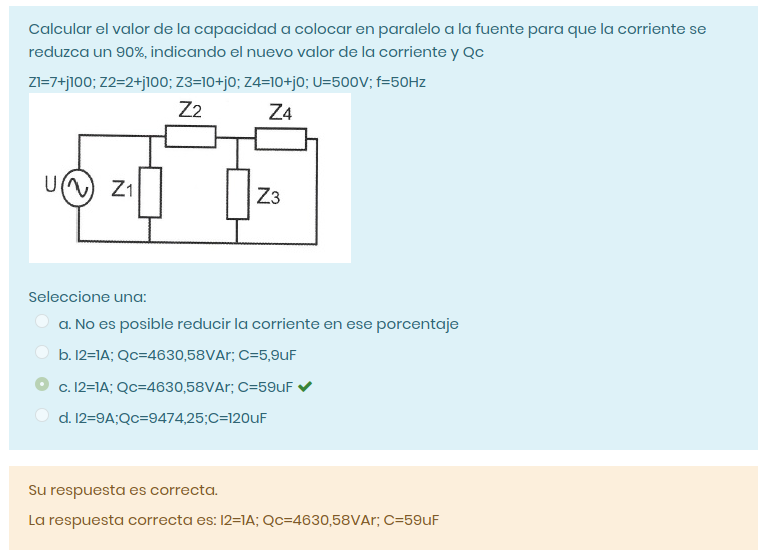

Estado compensado
$$ |I_2| = |I_1| \cdot 0,10 $$

In [ ]:
I2 = abs(I1)*0.1

In [ ]:
print('I2 = %.1f A'%I2)

I2 = 1.0 A


Cálculo de $\varphi_1$

In [ ]:
import math, cmath

In [ ]:
phi1 = cmath.phase(I1)

In [ ]:
print('phi1 = %.2f°'%(math.degrees(phi1)))

phi1 = -86.00°


Cálculo de $\varphi_2$
$$ P_1 = P_2 $$

$$ U I_1 \cos \varphi_1 = U I_2 \cos \varphi_2 $$

$$ \varphi_2 = \arccos \frac{|I_1| \cos \varphi_1}{|I_2|} $$

In [ ]:
phi2 = math.acos( abs(I1)*math.cos(phi1)/ I2 )

In [ ]:
print('phi2 = %.2f°'%(math.degrees(phi2)))

phi2 = 45.71°


Cálculo de $Q_2$
$$ Q_2 = U \cdot I_2 \sin \varphi_2 $$

In [ ]:
Q2 = U*I2*math.sin(phi2)

In [ ]:
print('Q2 = %.2f VAr'%Q2)

Q2 = 357.03 VAr


Cálculo de $Q_C$
$$ Q_C = Q_1 - Q_2 $$

In [ ]:
Qc = Q - Q2

In [ ]:
print('Qc = %.2f VAr'%Qc)

Qc = 4618.59 VAr


$$ Q_C = \frac{U^2}{X_C} = \frac{U^2}{1/(\omega C)} = U^2 \omega C $$

Cálculo de $C$
$$ C = \frac{Q_C}{\omega U^2} = \frac{Q_C}{2 \pi f U^2} $$

In [ ]:
C = Qc/(2*math.pi*f*U**2)

In [ ]:
print('C = %.2f uF'%(C*1e6))

C = 58.81 uF


In [ ]:
%reset -s -f

## Ejercicio 7

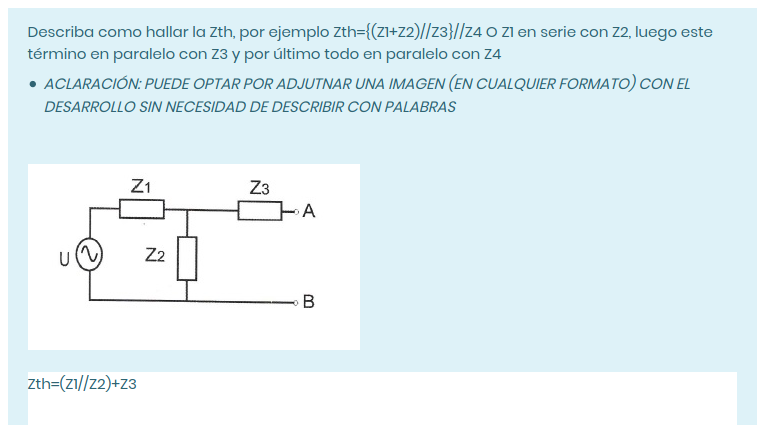

Hacemos $Z_1//Z_2$
$$ Z' = {Z_1 \cdot Z_2 \over Z_1 + Z_2} $$

En serie con $Z_3$
$$ Z_{th} = Z' + Z_3 $$

Entonces:
$$ Z_{th} = \frac{Z_1 \cdot Z_2}{Z_1 + Z_2} + Z_3 $$

## Ejercicio 8

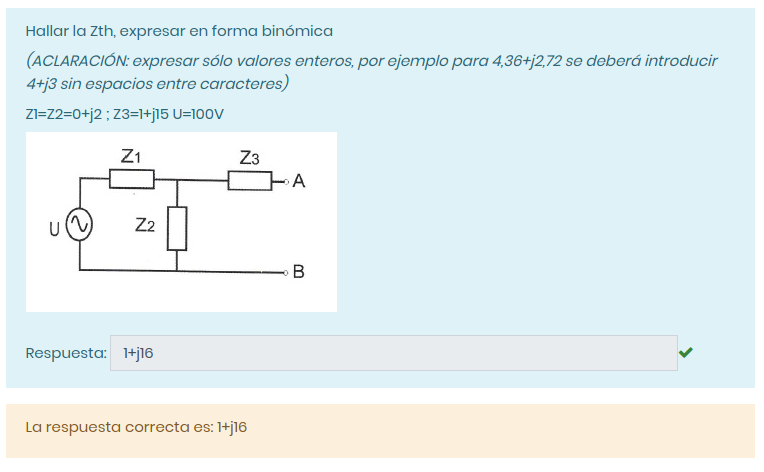

In [ ]:
# Datos:
Z1 = 0 + 2j # Ohm
Z2 = Z1
Z3 = 1 + 15j # Ohm
U = 100 # V

In [ ]:
# Cálculo de Zth
Zth = (Z1*Z2)/(Z1 + Z2) + Z3

In [ ]:
print('Zth = {:.0f} Ohm'.format(Zth))

Zth = 1+16j Ohm


## Ejercicio 9

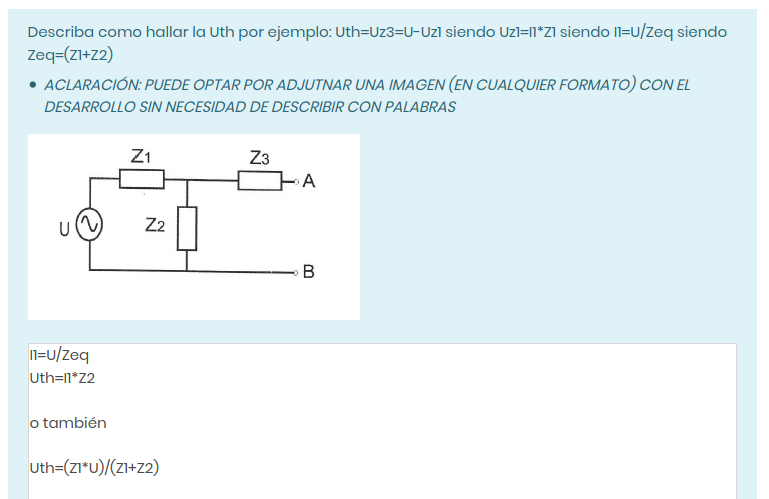

Impedancia equivalente:
$$ Z_{eq} = Z_1 + Z_2 $$

Cálculo de corriente
$$ I_1 = \frac{U}{Z_{eq}} $$

Cálculo de voltaje de Thevenin
$$ U_{th} = I_1 \cdot Z_2 $$

o también
$$ U_{th} = \frac{Z_1 \cdot U}{Z_1 + Z_2} $$

## Ejercicio 10

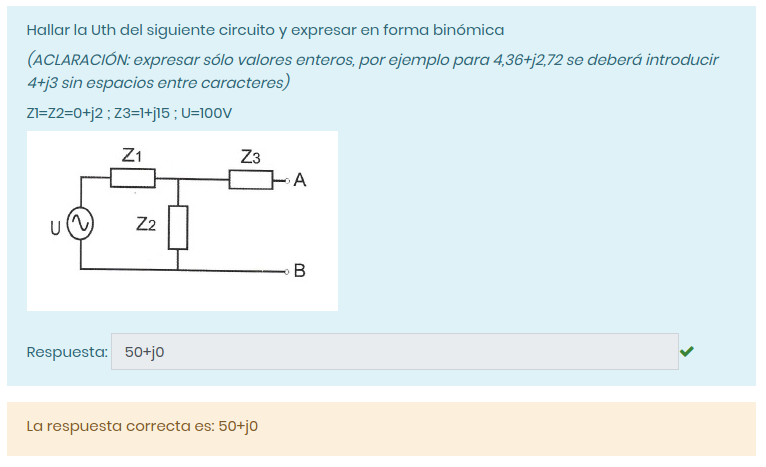

In [ ]:
# Cálculo de Zeq
Zeq = Z1 + Z2
# Cálculo de I
I = U/Zeq
# Cálculo de Uth
Uth = I*Z2

In [ ]:
print('Uth = {:.1f} Ohm'.format(Uth))

Uth = 50.0+0.0j Ohm


In [ ]:
%reset -s -f